In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load the orthologs info
>`Orthogroups_SpeciesOverlaps.csv` is a tab separated text file containing a matrix of the number of orthogroups shared by each species-pair (i.e. the number of orthogroups which contain at least one gene from each of the species-pairs).

In [3]:
df = pd.read_csv("./Orthogroups_SpeciesOverlaps.csv", sep="\t", index_col=0)

In [4]:
# Normalize the orthologs counts
df2 = df.apply(lambda x: (x/x.max())*100, axis=1)

---
# load genomes metadata

In [15]:
genomes_df = pd.read_csv("./Table_S2. Cyanophages collection.tsv", sep="\t")

----
# Prepare figure

## Build dataframe with row colors

In [18]:
lut = dict(zip(['?', 'Podoviridae', 'Myoviridae', 'Siphoviridae'], ['#e41a1c','#377eb8','#984ea3','#4daf4a']))

In [19]:
col_colors = pd.concat([genomes_df["Name"], genomes_df["Tax"].map(lut)], axis=1)

In [20]:
col_colors.rename(columns={"Name":"#query"}, inplace=True)

In [21]:
col_colors.set_index("#query", inplace=True)

In [22]:
col_colors = col_colors.loc[df.columns]

---
# Paper plot

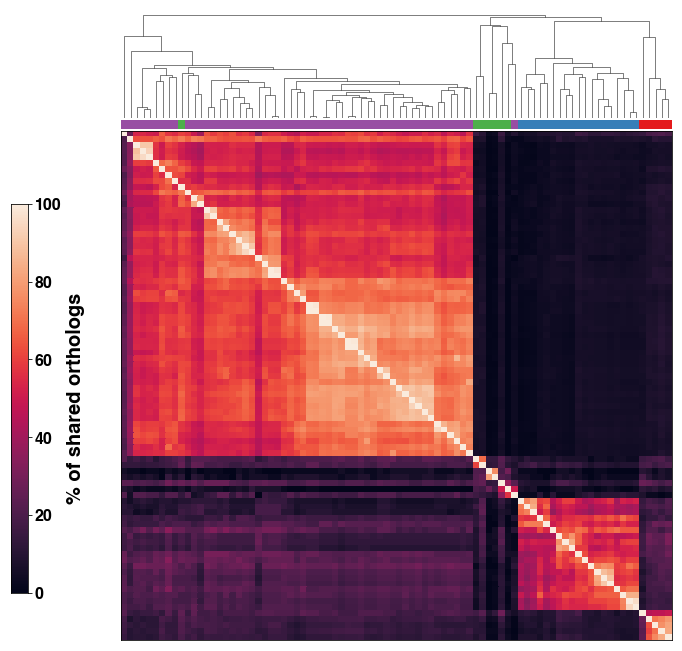

In [23]:
# Bold font for colormap. Return to default font weight using: sns.mpl.pyplot.rcdefaults()
sns.mpl.pyplot.rc('font', weight='bold')



sns.set_style({'font.family': [u'Helvetica']})
#sns.set_style()
g = sns.clustermap(df2, figsize=(12,12), col_colors=col_colors, metric="chebyshev",xticklabels = 0, yticklabels = 0)

# Hide right dendrogram
g.ax_row_dendrogram.axes.set_visible(False)

# Hide col_colors title
g.ax_col_colors.set_yticks([]);
# Make col_colors smaller
col_color_pos = g.ax_col_colors.get_position()
g.ax_col_colors.set_position([col_color_pos.x0, col_color_pos.y0, col_color_pos.width, col_color_pos.height*.3])

# Move dendrogram closer to col_colors
col_dendrogram = g.ax_col_dendrogram.get_position()
g.ax_col_dendrogram.set_position([col_dendrogram.x0, col_color_pos.y0+col_color_pos.height*.35, col_dendrogram.width, col_dendrogram.height])

# set the colorbar parameters (label)
g.ax_heatmap.collections[0].colorbar.set_label("% of shared orthologs", size=20, weight='bold')
g.ax_heatmap.collections[0].colorbar.ax.tick_params(labelsize=16) 
# (position)
g.cax.set_position([.135,.18,.02,.45])

# set heatmap and colorbar border
for element in [g.cax, g.ax_heatmap]:
    for axis in ['top','bottom','left','right']:
        element.spines[axis].set_visible(True)
        element.spines[axis].set_color('black')
    element.set_frame_on(True)

#g.savefig("./Fig_1a_orthologs.svg")
#sns.despine()

In [ ]:
from PIL import Image
from io import BytesIO
# save figure
# (1) save the image in memory in PNG format
png1 = BytesIO()
g.savefig(png1, format='png', dpi=300)

# (2) load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
png2.save('~/notebooks/bac/manuscript/figures/Fig_1a_orthologs.tiff')
png1.close()
png2.close()
